**In this notebook we will explore cost function for logistic regression and also determine why mean squared error cost function is not suitable for calculating cost for logistic regression and we will see example of cost function for logistic regression in action**

In [2]:
# let's start by importing the required libraries

import numpy as np
import matplotlib.pyplot as plt

In [3]:
# let's define the linear regression cost function for 1 D array

def lin_cost_fn(x, y, w, b):

    size_x = x.shape[0]
    pred_y = np.zeros(size_x)
    cost_fn = 0
    for i in range(size_x):
        pred_y_ex = x[i] * w + b
        pred_y[i] = 1/(1+np.exp(-pred_y_ex))
        error = pred_y[i] - y[i]
        cost_fn += np.square(error)

    cost_fn = cost_fn/(2*size_x)

    return cost_fn


In [4]:
# let's define our classification training data and calculate cost function at different model parameters

x_train = np.array([0., 1, 2, 3, 4, 5],dtype=np.longdouble)
y_train = np.array([0,  0, 0, 1, 1, 1],dtype=np.longdouble)

w_in = np.arange(-100,100)
b_in = np.arange(-10,190)

cost_arr = np.zeros((w_in.shape[0], b_in.shape[0]))

for i in range(w_in.shape[0]):
    for j in range(b_in.shape[0]):
        cost_arr[i, j] = lin_cost_fn(x_train, y_train, w_in[i], b_in[j])

print(f"Calculated cost is: {cost_arr}")

Calculated cost is: [[0.25       0.25       0.25000001 ... 0.41666667 0.41666667 0.41666667]
 [0.25       0.25       0.25000001 ... 0.41666667 0.41666667 0.41666667]
 [0.25       0.25       0.25000001 ... 0.41666667 0.41666668 0.41666674]
 ...
 [0.16666667 0.16666667 0.16666668 ... 0.25       0.25       0.25      ]
 [0.16666667 0.16666667 0.16666668 ... 0.25       0.25       0.25      ]
 [0.16666667 0.16666667 0.16666668 ... 0.25       0.25       0.25      ]]


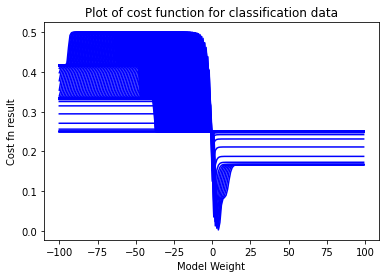

In [5]:

# now let's plot calculations from cost function on a graph against weight parameter
# this should give us a distorted view that states that linear cost function does not fit well to classification cases

plt.plot(w_in, cost_arr, marker="", color="b")
plt.title("Plot of cost function for classification data")
plt.xlabel("Model Weight")
plt.ylabel("Cost fn result")
plt.show()

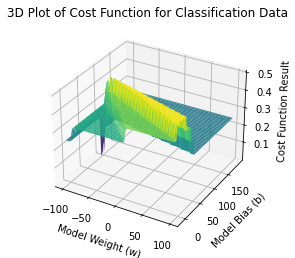

In [6]:
# Create a meshgrid of w and b values for 3D plotting
# this should give us a distorted view and not a bowl shape as we saw in linear regression that states that linear cost function does not fit well to classification cases
W, B = np.meshgrid(w_in, b_in)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the cost surface in 3D
ax.plot_surface(W, B, cost_arr, cmap='viridis')

# Set axis labels
ax.set_xlabel("Model Weight (w)")
ax.set_ylabel("Model Bias (b)")
ax.set_zlabel("Cost Function Result")

plt.title("3D Plot of Cost Function for Classification Data")
plt.show()

In [7]:
# let's define the logistic regression cost function for 1 D array

def log_cost_fn(x, y, w, b):

    size_x = x.shape[0]
    pred_y = np.zeros(size_x)
    cost_fn = 0
    for i in range(size_x):
        pred_y_ex = (x[i] * w) + b
        pred_y[i] = 1/(1+np.exp(-pred_y_ex))
        loss = -y[i]*np.log(pred_y[i]) - (1-y[i]) * np.log(1-pred_y[i])
        cost_fn += loss

    cost_fn = cost_fn/(size_x)

    return cost_fn


In [8]:
# let's define our classification training data and calculate logistic cost function at different model parameters

x_train = np.array([0., 1, 2, 3, 4, 5],dtype=np.longdouble)
y_train = np.array([0,  0, 0, 1, 1, 1],dtype=np.longdouble)

w_in = np.arange(-5,5)
b_in = np.arange(-5,5)

log_cost_arr = np.zeros((w_in.shape[0], b_in.shape[0]))

for i in range(w_in.shape[0]):
    for j in range(b_in.shape[0]):
        log_cost_arr[i, j] = log_cost_fn(x_train, y_train, w_in[i], b_in[j])

print(f"Calculated cost is: {log_cost_arr}")

Calculated cost is: [[12.50112684 12.00304569 11.50815417 11.02130761 10.5526257  10.11665137
   9.72192264  9.36264217  9.0294055   8.72231735]
 [10.50114018 10.00308193  9.50825264  9.02157499  8.55335046  8.11860646
   7.72712959  7.37606299  7.06144835  6.78829812]
 [ 8.50117806  8.00318486  7.50853215  7.02233272  6.55539514  6.12405668
   5.74120966  5.40988313  5.13215452  4.91090118]
 [ 6.50129491  6.00350223  5.50939276  5.02465676  4.56160266  4.14018027
   3.78047682  3.4946607   3.28855415  3.16429646]
 [ 4.50176778  4.00478521  3.51286253  3.0339613   2.58601967  2.20113158
   1.91888931  1.77035232  1.77035232  1.91888931]
 [ 2.50671535  2.01814993  1.54858735  1.12692801  0.81326169  0.69314718
   0.81326169  1.12692801  1.54858735  2.01814993]
 [ 0.70113158  0.41888931  0.27035232  0.27035232  0.41888931  0.70113158
   1.08601967  1.5339613   2.01286253  2.50478521]
 [ 0.1228548   0.16429646  0.28855415  0.4946607   0.78047682  1.14018027
   1.56160266  2.02465676  2.50

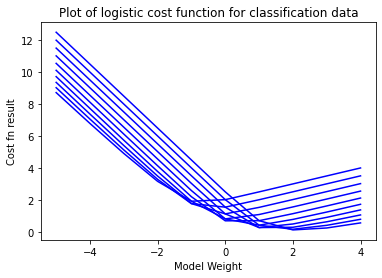

In [9]:

# now let's plot calculations from logistic cost function on a graph against weight parameter

plt.plot(w_in, log_cost_arr, marker="", color="b")
plt.title("Plot of logistic cost function for classification data")
plt.xlabel("Model Weight")
plt.ylabel("Cost fn result")
plt.show()

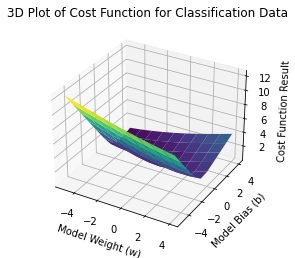

In [10]:
# Create a meshgrid of w and b values for 3D plotting

W, B = np.meshgrid(w_in, b_in)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the cost surface in 3D
ax.plot_surface(W, B, log_cost_arr, cmap='viridis')

# Set axis labels
ax.set_xlabel("Model Weight (w)")
ax.set_ylabel("Model Bias (b)")
ax.set_zlabel("Cost Function Result")

plt.title("3D Plot of Cost Function for Classification Data")
plt.show()